In [176]:
import pandas as pd

In [177]:
path='C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\Workplacelabels.csv'

In [178]:
DATIS=pd.read_csv(path)

In [179]:
DATIS[DATIS['Label2']!='Junk'].drop_duplicates(['RoomName'])

,Unnamed: 0,NameFilter,RoomModelId,ProjectName,RoomId,RoomName,Name2,Cluster,Label,Label2
0,0,acc shower toilet,-1001538135,KIRKLAND URBAN SOUTH,-1001538135:10410040,ACC SHOWER / TOILET,acc shower toilet,a1,restroom restrooms toilet toilets,Restroom
5,5,access mechanical,-1084757758,BUILDING 1,-1084757758:1167871,MECHANICAL ACCESS,mechanical access,a21,mechanical mech,Mechanical
8,8,access restroom,1275632693,THE PORTLAND BUILDING RECONSTRUCTION PROJECT,1275632693:19275794,RESTROOM ACCESS,restroom access,a1,restroom restrooms toilet toilets,Restroom
50,61,ada,2070452309,LINN BENTON LINCOLN ESD,2070452309:2901121,ADA WC,ada wc,a1,restroom restrooms toilet toilets,Restroom
53,65,ada changing,1275632693,THE PORTLAND BUILDING RECONSTRUCTION PROJECT,1275632693:23302043,ADA CHANGING,ada changing,a1,restroom restrooms toilet toilets,Restroom
...,...,...,...,...,...,...,...,...,...,...
13609,14514,workout yoga,-1443774924,POV T1 BLOCK A & C,-1443774924:26910281,YOGA/ WORKOUT ROOM,yoga workout room,a10,fitness yoga,fitness yoga
14037,14942,wrr,1634878593,USAA COLORADO SPRINGS INTERIORS PROJECT,1634878593:1702954,WRR,wrr,a30,cust mpoe,Restroom
14101,15006,yoga,1085433047,TERMINAL 1,1085433047:3538961,YOGA ROOM,yoga room,a10,fitness yoga,fitness yoga
14102,15007,yoga,-1790933234,1490 CURTIS STREET REPOSITIONING,-1790933234:5360591,YOGA AREA,yoga area,a10,fitness yoga,fitness yoga


In [180]:
import re
def preprocessor(text): 
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text

In [181]:
DATIS['RoomName'].apply(preprocessor)

0        acc shower  toilet
1        acc shower  toilet
2        acc shower  toilet
3        maintenance access
4        maintenance access
                ...        
14101             yoga room
14102             yoga area
14103                  yoga
14104             zen space
14105             zen space
Name: RoomName, Length: 14106, dtype: object

In [182]:
DATIS['CleanName']=DATIS['RoomName'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor)

In [183]:
len(DATIS['RoomName'].value_counts())-len(DATIS['CleanName'].value_counts())

80

In [184]:
DATIS['NameLen']=DATIS['RoomName'].str.len()
DATIS['RoomName']=DATIS['RoomName'].str.lower()
DATIS['TokenCount']=((DATIS['RoomName'].str.len()-DATIS['RoomName'].str.replace(' ','').str.len())+1)

<AxesSubplot:>

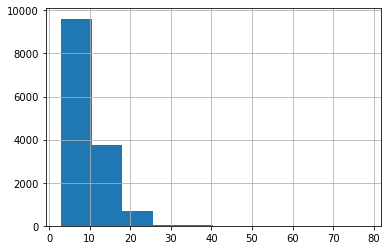

In [185]:
DATIS['NameLen'].hist()

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [187]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [188]:
DATIS.Label2=DATIS.Label2.str.lower()

In [189]:
DATIS['RoomType']=np.where((DATIS.Label2.str.contains('|'.join(['dining','laundry']))) | (DATIS.Label2=='junk'),'other',
                           np.where(DATIS.CleanName.str.contains('corridor'),'corridor vestibule',
                           DATIS['Label2']))

In [190]:
DATIS.drop_duplicates(['RoomType','CleanName']).groupby(['RoomType'])['RoomType'].count()

RoomType
break room                3
cafe                     23
conference               60
copy print               33
corridor vestibule       42
custodial                 3
electrical               40
elevator                 30
fitness yoga             24
focus room                7
generic office            4
huddle                   10
kitchen house            16
lab eis                  40
lobby floor              15
lockers                  14
lounge team              36
mechanical               14
mother room              11
open office               4
open shared              24
other                   711
phone room                9
private office            1
restroom                 93
security secure safe     13
stairs                   31
storage                 118
terrace patio            16
training teacher         12
Name: RoomType, dtype: int64

In [191]:
binomiallist=[]
for i in range(0,len(DATIS)):
        binomiallist.append(np.random.binomial(1, .03))

In [192]:
DATIS['Keep']=binomiallist
DATIS['Keep']=np.where((DATIS['RoomType']=='other') | (DATIS['RoomType']=='generic office'),DATIS['Keep'],1)


In [193]:
DATIS[(DATIS['RoomType']=='other') | (DATIS['RoomType']=='generic office')]['Keep'].value_counts()

0    5355
1     163
Name: Keep, dtype: int64

In [194]:
DATIS2=DATIS[DATIS['Keep']==1]

In [195]:
DATIS[DATIS['CleanName']=='corridor']

,Unnamed: 0,NameFilter,RoomModelId,ProjectName,RoomId,RoomName,Name2,Cluster,Label,Label2,CleanName,NameLen,TokenCount,RoomType,Keep
2532,2610,corridor,1634878593,USAA COLORADO SPRINGS INTERIORS PROJECT,1634878593:4270229,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1
2533,2611,corridor,-1001064926,BENNINGTON SCHOOL DISTRICT OFFICE 2ND FLOOR FI...,-1001064926:3469099,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1
2534,2612,corridor,1634878593,USAA COLORADO SPRINGS INTERIORS PROJECT,1634878593:4270104,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1
2535,2613,corridor,1634878593,USAA COLORADO SPRINGS INTERIORS PROJECT,1634878593:4271124,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1
2536,2614,corridor,2010910116,BLATTNER ENERGY OFFICE EXPANSION,2010910116:4045895,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,3281,corridor,2102479884,USAA CO3E RENOVATION,2102479884:2609478,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1
3122,3283,corridor,-1600956486,ANADARKO,-1600956486:4681425,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1
3123,3284,corridor,-1075270918,BUILDING 1,-1075270918:3100463,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1
3124,3285,corridor,1634878593,USAA COLORADO SPRINGS INTERIORS PROJECT,1634878593:4767437,corridor,corridor,a17,corridor vestibule,restroom,corridor,8,1,corridor vestibule,1


In [196]:
DATIS2['Dummy']=1

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
len(DATIS2)

8751

In [198]:
DATIS2['cSum']=DATIS2.groupby(['RoomType', 'CleanName'])['Dummy'].transform('cumsum')

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
DATIS2=DATIS2[DATIS2['cSum']<41]

In [200]:
#DATIS2=DATIS2.drop_duplicates(['RoomType','CleanName'])

In [201]:
y = DATIS2.RoomType.str.lower()

In [202]:
DATIS2['Name'] = DATIS2['CleanName']

In [203]:
X = DATIS2['Name']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 44)

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [206]:

#finding

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


parameters = {
    #'tfidf__ngram_range': ((1, 1), (1, 2),(1, 3),(1,4)), 
    'tfidf__max_df': (0.25,.4 ,0.5,.6,0.75, 1.0),
    'tfidf__use_idf': (True, False),
    'tfidf__sublinear_tf': (True, False),
    'tfidf__smooth_idf' : (True, False),
    'tfidf__min_df' : (1, 2,3),
    'tfidf__norm': ('l1', 'l2'),
    #'clf__alpha': (0.00001, 0.000001,0.0001,0.001,0.01)
    #'clf__loss': ('log', 'perceptron'),
    #'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'),
    #'clf__penalty': ('l2', 'elasticnet','l1')
}


pipeline = Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', SGDClassifier(loss='log',penalty='l1')),
              ])

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = grid_search.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9935846030473136
                      precision    recall  f1-score   support

          break room       1.00      1.00      1.00        27
                cafe       1.00      1.00      1.00        19
          conference       1.00      1.00      1.00       179
          copy print       1.00      1.00      1.00        82
  corridor vestibule       1.00      1.00      1.00        60
           custodial       1.00      1.00      1.00        17
          electrical       1.00      1.00      1.00        41
            elevator       1.00      1.00      1.00        74
        fitness yoga       1.00      0.96      0.98        25
          focus room       1.00      1.00      1.00        37
      generic office       0.80      1.00      0.89         8
              huddle       1.00      1.00      1.00        30
       kitchen house       1.00      1.00      1.00        20
             lab eis       1.00      0.96      0.98        24
         lobby floor       1.00      1.00

In [207]:
grid_search.best_params_

{'tfidf__max_df': 0.75,
 'tfidf__min_df': 1,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': False,
 'tfidf__sublinear_tf': True,
 'tfidf__use_idf': True}

In [208]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfvec=TfidfVectorizer(ngram_range=(1,3),max_df=.25,min_df=1,norm='l2',smooth_idf=True,sublinear_tf=False,use_idf=True)
mod=SGDClassifier(penalty='l1',loss='log',alpha=0.00001)

#vectorizer.fit(X_train)
#X_train2=vectorizer.transform(X_train)
#X_test2=vectorizer.transform(X_test)




text_clf = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', mod),
])


text_clf.fit(X_train, y_train)

#mod.fit(X_train2, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))


#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred))

accuracy 0.991980753809142
                      precision    recall  f1-score   support

          break room       1.00      1.00      1.00        27
                cafe       1.00      1.00      1.00        19
          conference       0.99      1.00      0.99       179
          copy print       0.98      1.00      0.99        82
  corridor vestibule       1.00      1.00      1.00        60
           custodial       1.00      1.00      1.00        17
          electrical       1.00      1.00      1.00        41
            elevator       1.00      1.00      1.00        74
        fitness yoga       1.00      0.96      0.98        25
          focus room       1.00      1.00      1.00        37
      generic office       0.80      1.00      0.89         8
              huddle       1.00      1.00      1.00        30
       kitchen house       1.00      1.00      1.00        20
             lab eis       1.00      1.00      1.00        24
         lobby floor       1.00      1.00 

In [209]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
from onnxmltools import save_model
from onnxruntime import InferenceSession

In [210]:
onnx_model = convert_sklearn(text_clf,
name='WorkPlaceRoomTypeClassifier',
initial_types=[('input', StringTensorType([1, 1]))]
)

save_model(onnx_model, 'WorkPlaceRoomClass.onnx')
sess = InferenceSession("WorkPlaceRoomClass.onnx")
label_name = sess.get_outputs()[0].name
input_name = sess.get_inputs()[0].name

#res = sess.run(None, input_feed={'input': np.array([['corridor']])})

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\operator_converters\text_vectoriser.py:185: UserWarning: Converter for TfidfVectorizer will use scikit-learn regular expression by default in version 1.6.
  UserWarning)
C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\common\_container.py:595: UserWarning: Unable to find operator 'Tokenizer' in domain 'com.microsoft' in ONNX, op_version is forced to 1.
  op_type, domain))


In [224]:
sess.run(None, input_feed={'input': np.array([['mothers']])})


[array(['mother room'], dtype=object),
 [{'break room': 0.0005759786581620574,
   'cafe': 0.0006716460920870304,
   'conference': 0.00038008898263797164,
   'copy print': 0.00014496473886538297,
   'corridor vestibule': 0.0007739099091850221,
   'custodial': 0.0005651547689922154,
   'electrical': 0.0004956425400450826,
   'elevator': 0.0004809398960787803,
   'fitness yoga': 5.2140632760711014e-05,
   'focus room': 0.00019142402743455023,
   'generic office': 0.0007150793680921197,
   'huddle': 0.0001968972064787522,
   'kitchen house': 0.0006370276096276939,
   'lab eis': 0.0004988845903426409,
   'lobby floor': 9.631244756747037e-05,
   'lockers': 0.0005096289096400142,
   'lounge team': 0.0005463514244183898,
   'mechanical': 0.0005544290761463344,
   'mother room': 0.9861865043640137,
   'open office': 0.00037376992986537516,
   'open shared': 0.0007438099128194153,
   'other': 0.00022240099497139454,
   'phone room': 0.0003126066876575351,
   'private office': 0.00025192697648890

In [43]:
with open("TextClassifier1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [42]:
res

[array(['services1'], dtype=object),
 [{'amenity': 0.07348394393920898,
   'circulation': 0.044751111418008804,
   'collaboration: closed': 0.07773763686418533,
   'collaboration: open': 0.04349435120820999,
   'desking: open workstation': 0.031024377793073654,
   'desking: private office': 0.049801651388406754,
   'lab': 0.04049787297844887,
   'services 2': 0.039142508059740067,
   'services1': 0.4987942576408386,
   'support': 0.10127229988574982}]]

In [336]:
import pickle

In [337]:
pickle.dump(vectorizer, open('C:\\Users\dmckenzie\documents\\roomvectorizer.pickle', "wb"))

In [338]:
pickle.dump(mod, open('C:\\Users\dmckenzie\documents\\roommodel.pickle', "wb"))

In [68]:
len(y_pred)
len(X_test)

4948

In [79]:
matchdf=pd.DataFrame({'A':list(y_pred2[X_test.isin(list(X_train))==False]),
              'B':list(y_test[X_test.isin(list(X_train))==False])})

In [80]:
matchdf['C']=(matchdf['A']==matchdf['B'])*1

In [81]:
matchdf['D']=1

In [82]:
labels=list(matchdf.groupby(['A'])['D'].sum().index)

In [83]:
scores=list(matchdf.groupby(['A'])['C'].sum().values/matchdf.groupby(['A'])['D'].sum().values)

In [84]:
print('Accuracy:',matchdf['C'].sum()/matchdf['D'].sum())

Accuracy: 0.8950617283950617


In [85]:
pd.DataFrame({'Category':labels,'Guesses':list(matchdf.groupby(['A'])['D'].sum().values),'True Positive Rate':scores})

,Category,Guesses,True Positive Rate
0,art digital exist,10,0.600000
1,bathroom,32,0.843750
2,classroom,83,0.879518
3,collaboration student work,4,1.000000
4,common social collaboration,11,0.636364
5,conference resource collaboration,6,0.833333
6,corridor mail central,3,0.666667
7,lab exist flex,23,0.782609
8,locker athletic official,13,1.000000
9,mechanical yard auditorium,5,0.800000


C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

<AxesSubplot:title={'center':'Classifier Validation Score As Training Data Grows'}, xlabel='Training Data Size', ylabel='Validation Score'>

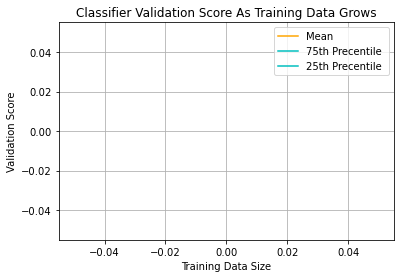

In [39]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

#np.random.seed(0)
#X, y = load_iris(return_X_y=True)
#indices = np.arange(y.shape[0])
#np.random.shuffle(indices)
#X, y = X[indices], y[indices]

train_sizes, train_scores, valid_scores = learning_curve(SGDClassifier(penalty='l1',loss='log',alpha=0.00001),
                                                         X_train, y_train, train_sizes=[10,20,30,40,50,60,70,80,90,100,
                                                                                         110,120,130,140,150,160,170,180,190,200,
                                                                                         210,220,230,240,250,260,270,280,290,300,
                                                                                         310,320,330,340,350,360,370,380,390,400,
                                                                                        410,420,430],cv=5)
pd.DataFrame({'Mean':list(pd.DataFrame(valid_scores.transpose()).median()),
             '75th Precentile ':list(pd.DataFrame(valid_scores.transpose()).quantile(0.75)),
             '25th Precentile':list(pd.DataFrame(valid_scores.transpose()).quantile(0.25))},
             index=train_sizes).plot(color = ['orange', 'c','c'],
                                    xlabel='Training Data Size',ylabel='Validation Score',
                                     grid=True,title='Classifier Validation Score As Training Data Grows')

In [37]:
pd.DataFrame(valid_scores.transpose()).mean().plot()

NameError: name 'valid_scores' is not defined

In [38]:
pd.DataFrame(pd.DataFrame(valid_scores.transpose())).plot()

NameError: name 'valid_scores' is not defined